<a href="https://colab.research.google.com/github/CHANDANSATVIK/Ybi-Foundation-Internship-Project/blob/INTERNSHIP-PROJECT/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of Project: Financial Market News Sentiment Analysis

# Objective:To analyze and classify financial market news based on sentiment using machine learning techniques.

# **Data Source:The dataset used is from this GitHub link: https://github.com/YBIFoundation/Dataset/blob/main/Financial%20Market%20News.csv.**

# **Import Library**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **Import Data**

In [8]:
url = "https://github.com/YBIFoundation/Dataset/blob/main/Financial%20Market%20News.csv?raw=true"
df = pd.read_csv(url, encoding='latin1')


# **Describe Data**

In [9]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nInformation about the dataset:")
print(df.info())
print("\nShape of the dataset:")
print(df.shape)
print("\nColumns in the dataset:")
print(df.columns)

First 5 rows of the dataset:
         Date  Label                                             News 1  \
0  01-01-2010      0           McIlroy's men catch cold from Gudjonsson   
1  02-01-2010      0               Warning from history points to crash   
2  03-01-2010      0      Comment: Why Israel's peaceniks feel betrayed   
3  04-01-2010      1             £750,000-a-goal Weah aims parting shot   
4  05-01-2010      1  Leeds arrive in Turkey to the silence of the fans   

                                       News 2  \
0                       Obituary: Brian Walsh   
1              Investors flee to dollar haven   
2  Court deals blow to seizure of drug assets   
3            Newcastle pay for Fletcher years   
4     One woman's vision offers loan lifeline   

                                            News 3  \
0       Workplace blues leave employers in the red   
1                      Banks and tobacco in favour   
2                       An ideal target for spooks   
3  Brown 

# **Data Visualization**

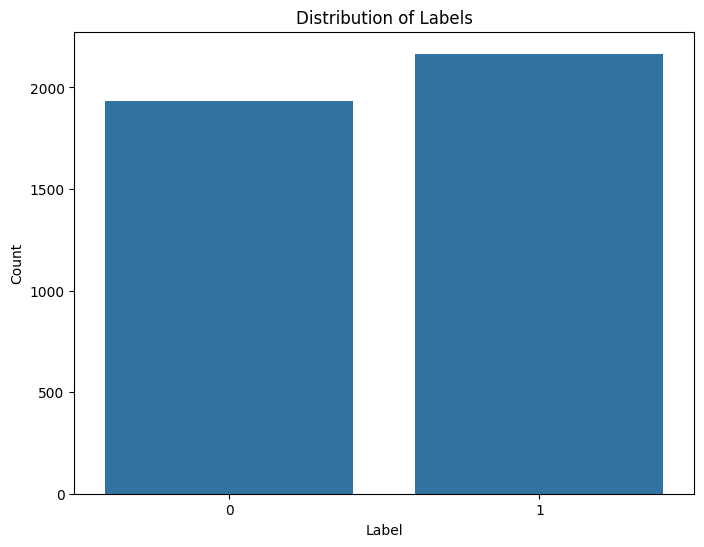

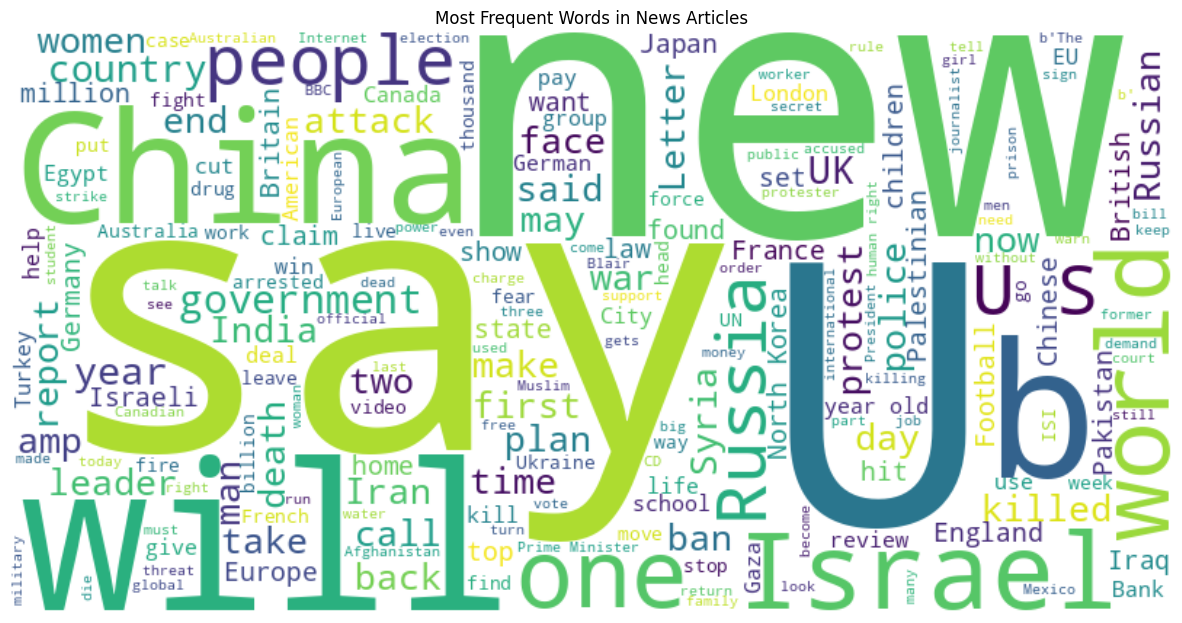

In [10]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Most frequent words in the news articles
all_news = ' '.join([' '.join(str(x) for x in df.iloc[row, 2:27]) for row in range(len(df.index))])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_news)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in News Articles')
plt.axis('off')
plt.show()

# **Data Preprocessing**

In [11]:
# Combining selected features into a single text column
news = []
for row in range(len(df.index)):
    news.append(' '.join(str(x) for x in df.iloc[row, 2:27]))

# Checking the type and first element of the combined news
print("\nType of the combined news list:", type(news))
print("\nFirst element of the combined news list:")
print(news[0])


Type of the combined news list: <class 'list'>

First element of the combined news list:
McIlroy's men catch cold from Gudjonsson Obituary: Brian Walsh Workplace blues leave employers in the red Classical review: Rattle Dance review: Merce Cunningham Genetic tests to be used in setting premiums Opera review: La Bohème Pop review: Britney Spears Theatre review: The Circle Wales face a fraught night Under-21  round-up Smith off to blot his copybook Finns taking the mickey Praise wasted as Brown studies injury options Ireland wary of minnows Finland 0 - 0 England Healy a marked man Happy birthday Harpers & Queen Win unlimited access to the Raindance film festival Labour pledges £800m to bridge north-south divide Wales: Lib-Lab pact firm despite resignation Donald Dewar Regenerating homes  regenerates well-being in people Win £100 worth of underwear TV guide: Random views


# **Define Target Variable (y) and Feature Variables (X)**

In [12]:
X = news
y = df['Label']

# Convert text data to bag of words
cv = CountVectorizer(lowercase=True, ngram_range=(1, 1))
X = cv.fit_transform(X)

# Check the shapes of X and y
print("\nShape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (4101, 48527)
Shape of y (target): (4101,)


# **Train Test Split**

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2529)

# **Modeling**

In [14]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

# **Model Evaluation**

In [15]:
y_pred = rf.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[117 367]
 [163 379]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.24      0.31       484
           1       0.51      0.70      0.59       542

    accuracy                           0.48      1026
   macro avg       0.46      0.47      0.45      1026
weighted avg       0.47      0.48      0.46      1026


Accuracy Score: 0.4834307992202729


# **Prediction**

In [16]:
sample_news = ["Positive news about the market", "Negative news affecting stocks"]
sample_news_transformed = cv.transform(sample_news)
predictions = rf.predict(sample_news_transformed)
print("\nPredictions for sample news:")
print(predictions)


Predictions for sample news:
[1 1]


# **Explanation:**
This project involves analyzing financial news articles to predict their sentiment.
The data is preprocessed by combining relevant columns, converting text data into numerical features using CountVectorizer,
and splitting the data into training and testing sets.
A RandomForestClassifier is trained on the data, and its performance is evaluated using confusion matrix, classification report,
and accuracy score. Finally, the model can predict sentiment for new news articles.
